In [1]:
import pandas as pd
import numpy as np

In [3]:
# Data loading and preprocessing
# Load the flight data from the Excel file
try:
    flight_data = pd.read_excel('data/British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx')
    print(f"Data loaded successfully: {len(flight_data)} flights found.")
except FileNotFoundError:
    print(f"File not found. Please check the file path.")
    flight_data = None

flight_data.head(10)

Data loaded successfully: 10000 flights found.


,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27
5,2025-07-12,19:08:00,Evening,BA,BA4954,LHR,VIE,Austria,Europe,SHORT,A320,0,20,160,0,6,27
6,2025-09-16,21:44:00,Evening,BA,BA9840,LHR,AMS,Netherlands,Europe,SHORT,A320,0,20,160,0,16,55
7,2025-04-24,14:50:00,Afternoon,BA,BA7116,LHR,ORD,USA,North America,LONG,A350,0,56,275,1,12,42
8,2025-05-17,12:13:00,Lunchtime,BA,BA4424,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,5,23
9,2025-05-01,09:55:00,Morning,BA,BA4878,LHR,IST,Turkey,Europe,SHORT,A320,0,4,176,1,11,39


In [4]:
if flight_data is not None:
    

    # Calculate total number of seats per flight
    flight_data['TOTAL_SEATS'] = (flight_data['FIRST_CLASS_SEATS'] +  flight_data['BUSINESS_CLASS_SEATS'] +  flight_data['ECONOMY_SEATS'])

    # Filter out flights with no seats
    flight_data = flight_data[flight_data['TOTAL_SEATS'] > 0].copy()  

    # Calculate tier eligible passengers
    flight_data['TOTAL_TIER_ELIGIBLE'] = (flight_data['TIER1_ELIGIBLE_PAX'] + flight_data['TIER2_ELIGIBLE_PAX'] + flight_data['TIER3_ELIGIBLE_PAX'])


    # Feature engineering
    # Calculate the percentage of tier eligible passengers
    flight_data['TIER1_PCT'] = ((flight_data['TIER1_ELIGIBLE_PAX'] / flight_data['TOTAL_SEATS']) * 100)
    flight_data['TIER2_PCT'] = ((flight_data['TIER2_ELIGIBLE_PAX'] / flight_data['TOTAL_SEATS']) * 100)
    flight_data['TIER3_PCT'] = ((flight_data['TIER3_ELIGIBLE_PAX'] / flight_data['TOTAL_SEATS']) * 100)


    # Analysis of flight data
    # # Group by the chosen categories (HAUL and TIME_OF_DAY) and find the average eligibility percentage for each group. This aggregation creates the generalized model.
    lookup_table = flight_data.groupby(['HAUL', 'TIME_OF_DAY'])[['TIER1_PCT', 'TIER2_PCT', 'TIER3_PCT']].mean().reset_index()

    # Total lounge demand
    lookup_table['TOTAL_LOUNGE_DEMAND'] = (lookup_table['TIER1_PCT'] + lookup_table['TIER2_PCT'] + lookup_table['TIER3_PCT']) 
    print("\n Total Lounge Demand by Haul and Time of Day \n")
    display(lookup_table['TOTAL_LOUNGE_DEMAND'].astype(str) + ' - ' + lookup_table['TIME_OF_DAY'])

    # Round the mean values to 3 decimals
    lookup_table[['TIER1_PCT', 'TIER2_PCT', 'TIER3_PCT']] = lookup_table[['TIER1_PCT', 'TIER2_PCT', 'TIER3_PCT']].round(3)


    # Format the table for clarity and presentation
    lookup_table.rename(columns={
        'TIER1_PCT': 'Tier 1 %',
        'TIER2_PCT': 'Tier 2 %',
        'TIER3_PCT': 'Tier 3 %'
    }, inplace=True)

    # Create a combined 'Grouping' column for better display
    lookup_table.reset_index(inplace=True)
    lookup_table['Grouping'] = lookup_table['HAUL'] + ' - ' + lookup_table['TIME_OF_DAY']
    lookup_table = lookup_table[['Grouping', 'Tier 1 %', 'Tier 2 %', 'Tier 3 %']].sort_values('Grouping')


    print("\n Lounge Eligibility Lookup Table \n")
    display(lookup_table)
    


 Total Lounge Demand by Haul and Time of Day 



0    14.315421486466866 - Afternoon
1      14.067287015475173 - Evening
2    14.136554480833016 - Lunchtime
3      14.427785137372787 - Morning
4    21.242476004555066 - Afternoon
5      21.775721318626534 - Evening
6     22.21781887567885 - Lunchtime
7       21.44084635626443 - Morning
dtype: object


 Lounge Eligibility Lookup Table 



,Grouping,Tier 1 %,Tier 2 %,Tier 3 %
0,LONG - Afternoon,0.205,2.937,11.173
1,LONG - Evening,0.228,2.865,10.975
2,LONG - Lunchtime,0.192,2.889,11.056
3,LONG - Morning,0.222,2.952,11.255
4,SHORT - Afternoon,0.342,4.313,16.587
5,SHORT - Evening,0.328,4.452,16.996
6,SHORT - Lunchtime,0.394,4.549,17.275
7,SHORT - Morning,0.340,4.358,16.743


## Explanation
The flights were grouped by **Haul Type** (LONG/SHORT) and **Time of Day** (Morning, Afternoon, Evening, Lunchtime) for the following reasons:

1. **Haul Type as a Primary Driver**: Long-haul flights typically have a higher proportion of premium cabin passengers (First and Business Class) who are more likely to be eligible for lounge access. This is because these flights are often associated with business travel and higher-end leisure travel. The EDA confirmed that Haul Type is a strong differentiator for lounge eligibility.

2. **Time of Day as a Secondary Driver**: The time of day also plays a crucial role in passenger behavior and lounge usage.

    - **Morning Departures**: Often attract business travelers who may use the lounge for work before their flight.
    - **Evening Departures**: Popular with both business and leisure travelers, who might want to relax in the lounge before a long flight.
    - **Lunchtime and Afternoon Departures**: Show slightly different patterns, which is why they are included as separate categories.

3. **Simplicity and Scalability**: This grouping strategy is both simple to understand and easy to apply to future flight schedules, which was a key requirement of the task. It avoids getting into too much detail (like specific routes or aircraft types) which might make the model less flexible.

4. **Actionable Insights**: The resulting lookup table provides clear and actionable insights for the Airport Planning team. For example, they can anticipate higher lounge demand for short-haul flights departing in the lunchtime and plan resources accordingly.

### Lounge Eligibility Lookup Table

| Grouping             |Example Destination       | Tier 1 % | Tier 2 % | Tier 3 % |
|----------------------|--------------------------|----------|----------|----------|
| LONG - Afternoon     | Los Angles (LAX)         | 0.205    | 2.937    | 11.173   |
| LONG - Evening       | Dubai      (DBX)         | 0.228    | 2.865    | 10.975   |
| LONG - Lunchtime     | Chicago    (ORD)         | 0.192    | 2.889    | 11.056   |
| LONG - Morning       | Los Angles (LAX)         | 0.222    | 2.952    | 11.255   |
| SHORT - Afternoon    | Frankurt   (FRA)         | 0.342    | 4.313    | 16.587   |
| SHORT - Evening      | Flughafen  (MUC)         | 0.328    | 4.452    | 16.996   |
| SHORT - Lunchtime    | Amsterdam  (AMS)         | 0.394    | 4.549    | 17.275   |
| SHORT - Morning      | Madrid     (MAD)         | 0.340    | 4.358    | 16.743   |

This table summarizes the average percentage of tier-eligible passengers by haul and time of day, supporting resource planning and operational decisions.


 Demand Patterns by Haul and Time of Day 



,HAUL,TIME_OF_DAY,Total Eligible Passengers
0,LONG,Afternoon,37049
1,LONG,Evening,45655
2,LONG,Lunchtime,16735
3,LONG,Morning,58129
4,SHORT,Afternoon,52231
5,SHORT,Evening,69887
6,SHORT,Lunchtime,30274
7,SHORT,Morning,79850


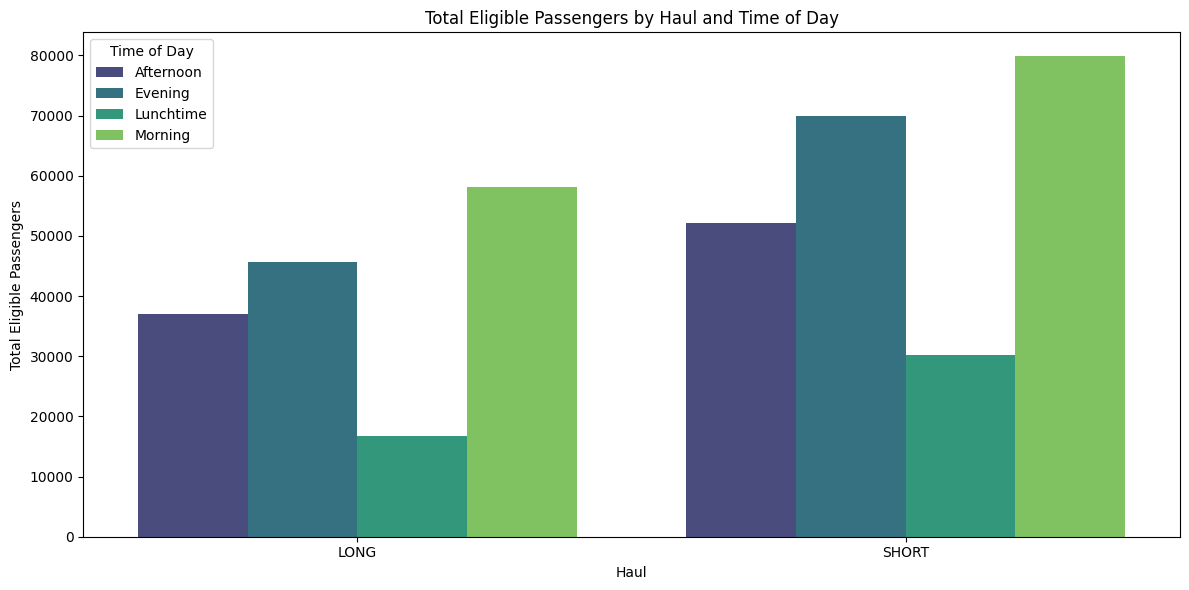

In [7]:
# Demand Patterns
# Analyze demand patterns by haul and time of day
if flight_data is not None:
    demand_patterns = flight_data.groupby(['HAUL', 'TIME_OF_DAY'])['TOTAL_TIER_ELIGIBLE'].sum().reset_index()
    demand_patterns.rename(columns={'TOTAL_TIER_ELIGIBLE': 'Total Eligible Passengers'}, inplace=True)

    print("\n Demand Patterns by Haul and Time of Day \n")
    display(demand_patterns)
else:
    print("No flight data available to analyze demand patterns.")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns   
if flight_data is not None:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=demand_patterns, x='HAUL', y='Total Eligible Passengers', hue='TIME_OF_DAY', palette='viridis')
    plt.title('Total Eligible Passengers by Haul and Time of Day')
    plt.xlabel('Haul')
    plt.ylabel('Total Eligible Passengers')
    plt.legend(title='Time of Day')
    plt.tight_layout()
    plt.show()
else:
    print("Flight data could not be loaded. Please check the file path and ensure the file exists.")
